Dataset Columns:

- id: Unique identifier for each house (we’ll set this as the index for organization)
- bedrooms: Number of bedrooms
- sqft_living: Total square footage of the living area
- sqft_lot: Square footage of the lot
- floors: Number of floors
- sqft_above: Square footage above ground
- sqft_basement: Square footage of the basement
- price: House price (target variable)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/Regression_housedata.csv',sep=";", index_col="id")

df.head()

,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
id,,,,,,,
7129300520,3,1180,5650,1,1180,0,221900.0
6414100192,3,2570,7242,2,2170,400,538000.0
5631500400,2,770,10000,1,770,0,180000.0
2487200875,4,1960,5000,1,1050,910,604000.0
1954400510,3,1680,8080,1,1680,0,510000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 7129300520 to 1442800370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    int64  
 1   sqft_living    999 non-null    int64  
 2   sqft_lot       999 non-null    int64  
 3   floors         999 non-null    int64  
 4   sqft_above     999 non-null    int64  
 5   sqft_basement  999 non-null    int64  
 6   price          999 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 62.4 KB


In [ ]:
df.nunique()

,0
bedrooms,8
sqft_living,321
sqft_lot,828
floors,3
sqft_above,291
sqft_basement,140
price,580


In [ ]:
import pandas as pd

def column_summary(df):
    summary = []
    for col in df.columns:
        col_data = df[col]
        summary.append({
            "Column": col,
            "Data Type": col_data.dtype,
            "Unique Values": col_data.nunique()
        })
    summary_df = pd.DataFrame(summary)
    return summary_df

# Usage example

summary_df = column_summary(df)
print(summary_df)


          Column Data Type  Unique Values
0       bedrooms     int64              8
1    sqft_living     int64            321
2       sqft_lot     int64            828
3         floors     int64              3
4     sqft_above     int64            291
5  sqft_basement     int64            140
6          price   float64            580


In [ ]:
df["id"] =  df["id"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             999 non-null    object 
 1   bedrooms       999 non-null    int64  
 2   sqft_living    999 non-null    int64  
 3   sqft_lot       999 non-null    int64  
 4   floors         999 non-null    int64  
 5   sqft_above     999 non-null    int64  
 6   sqft_basement  999 non-null    int64  
 7   price          999 non-null    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


## How to get help on any object or method in Python or Scikit learn or Pandas

In [ ]:
?pd.read_csv

In [ ]:
# Drop columns if necessary (commented for template purposes)
# columns_to_drop = ['some_column']
# df = df.drop(columns=columns_to_drop)

In [ ]:
# Check for missing values
print(df.isnull().sum())

bedrooms         0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
price            0
dtype: int64


In [ ]:
# # Jorges Data Report
# import pandas as pd

# def analyze_columns_for_encoding(df, threshold=50):
#     """
#     Analyzes the dataframe columns, checking the number of unique values
#     and recommending which columns should be dropped, kept, or treated
#     before using get_dummies for encoding to avoid dimensionality issues.

#     Parameters:
#     df : pandas.DataFrame
#         The dataframe to analyze.
#     threshold : int
#         The maximum number of unique values in a column to recommend encoding.

#     Returns:
#     report : pandas.DataFrame
#         A report with recommendations for each column.
#     """
#     # Create an empty DataFrame for the report
#     report = pd.DataFrame(columns=['Column', 'Data Type', 'Unique Values', 'Recommendation'])

#     for column in df.columns:
#         unique_values = df[column].nunique()
#         data_type = df[column].dtype

#         # Determine the recommendation based on unique values and data type
#         if data_type == 'object' or data_type == 'category':
#             if unique_values > threshold:
#                 recommendation = "Consider Dropping or Encoding Differently (Too many categories)"
#             elif unique_values == 2:
#                 recommendation = "Keep (Binary category)"
#             else:
#                 recommendation = "Keep but beware of dimensionality (Low unique categories)"
#         elif data_type in ['int64', 'float64']:
#             if unique_values == 2:
#                 recommendation = "Keep (Binary numeric)"
#             else:
#                 recommendation = "Keep (Continuous)"
#         else:
#             recommendation = "Consider Dropping (Unknown data type)"

#         # Create a new row with the column analysis
#         new_row = pd.DataFrame({
#             'Column': [column],
#             'Data Type': [data_type],
#             'Unique Values': [unique_values],
#             'Recommendation': [recommendation]
#         })

#         # Concatenate the new row to the report DataFrame
#         report = pd.concat([report, new_row], ignore_index=True)

#     return report

# # Set your threshold for handling categorical variables
# threshold_value = 50

# # Analyze the dataframe columns
# report = analyze_columns_for_encoding(df, threshold=threshold_value)

# # Display the report
# report

,Column,Data Type,Unique Values,Recommendation
0,bedrooms,int64,8,Keep (Continuous)
1,sqft_living,int64,321,Keep (Continuous)
2,sqft_lot,int64,828,Keep (Continuous)
3,floors,int64,3,Keep (Continuous)
4,sqft_above,int64,291,Keep (Continuous)
5,sqft_basement,int64,140,Keep (Continuous)
6,price,float64,580,Keep (Continuous)


In [ ]:
# import pandas as pd

# def analyze_object_columns_for_ohe(df, threshold=50):
#     """
#     Analyzes all object-type columns in the dataframe, computes how many columns
#     would be created using get_dummies (one-hot encoding), and makes a recommendation
#     about whether to keep, drop, or encode the column differently.

#     Parameters:
#     df : pandas.DataFrame
#         The dataframe to analyze.
#     threshold : int
#         The maximum number of unique values in a column to recommend encoding.

#     Returns:
#     report : pandas.DataFrame
#         A report with recommendations for each object-type column.
#     """
#     report = pd.DataFrame(columns=['Column', 'Unique Values', 'Potential OHE Columns', 'Recommendation'])

#     # Select only object-type columns
#     object_cols = df.select_dtypes(include=['object']).columns

#     for column in object_cols:
#         unique_values = df[column].nunique()
#         potential_ohe_columns = unique_values  # Number of columns created by get_dummies()

#         # Make recommendations based on the number of unique values
#         if unique_values > threshold:
#             recommendation = "Consider Dropping or Encoding Differently (Too many categories)"
#         elif unique_values == 2:
#             recommendation = "Keep (Binary category)"
#         else:
#             recommendation = "Keep but beware of dimensionality"

#         # Create a new row with the column analysis
#         new_row = pd.DataFrame({
#             'Column': [column],
#             'Unique Values': [unique_values],
#             'Potential OHE Columns': [potential_ohe_columns],
#             'Recommendation': [recommendation]
#         })

#         # Concatenate the new row to the report DataFrame
#         report = pd.concat([report, new_row], ignore_index=True)

#     return report

# # Set the threshold for handling categorical variables
# threshold_value = 50

# # Analyze the dataframe columns that are of type object
# report = analyze_object_columns_for_ohe(df, threshold=threshold_value)

# # Display the report
# report

,Column,Unique Values,Potential OHE Columns,Recommendation


In [ ]:
# # USE THIS REPORT TO EYEBALL ANY POTENTIAL ISSUES

# import pandas as pd
# import numpy as np

# def data_quality_report(df):
#     report = []

#     for col in df.columns:
#         col_data = df[col]
#         col_type = col_data.dtype
#         unique_values = col_data.nunique()
#         missing_values = col_data.isnull().sum()

#         # Initialize problem and recommendation lists
#         problems = []
#         recommendations = []

#         # Check for high cardinality in non-numeric columns
#         if col_type == 'object' and unique_values > 50:
#             problems.append("High cardinality (many unique values)")
#             recommendations.append("Consider encoding with caution or reducing categories")

#         # Check for missing values
#         if missing_values > 0:
#             problems.append(f"Missing values (count: {missing_values})")
#             recommendations.append("Consider imputing missing values or removing rows")

#         # For numeric columns only, check for infinities and other issues
#         if pd.api.types.is_numeric_dtype(col_data):
#             # Check for infinities
#             has_inf = np.isinf(col_data).sum()
#             if has_inf > 0:
#                 problems.append(f"Infinities found (count: {has_inf})")
#                 recommendations.append("Consider replacing infinities with a large finite value")

#         # Check if column is non-numeric and may need encoding
#         elif col_type == 'object':
#             problems.append("Non-numeric column may require encoding")
#             recommendations.append("Consider one-hot encoding or label encoding if needed")

#         # Add column summary to report
#         report.append({
#             "Column": col,
#             "Data Type": col_type,
#             "Unique Values": unique_values,
#             "Potential Problems": "; ".join(problems) if problems else "None",
#             "Recommendations": "; ".join(recommendations) if recommendations else "None"
#         })

#     # Convert report to a DataFrame for easy viewing
#     report_df = pd.DataFrame(report)
#     return report_df

# # Usage example
# report_df = data_quality_report(df)
# report_df


,Column,Data Type,Unique Values,Potential Problems,Recommendations
0,bedrooms,int64,8,None,None
1,sqft_living,int64,321,None,None
2,sqft_lot,int64,828,None,None
3,floors,int64,3,None,None
4,sqft_above,int64,291,None,None
5,sqft_basement,int64,140,None,None
6,price,float64,580,None,None


## Run a data quality report

In [ ]:
import pandas as pd
import numpy as np

def data_quality_report(df):
    report = []

    for col in df.columns:
        col_data = df[col]
        col_type = col_data.dtype
        unique_values = col_data.nunique()
        missing_values = col_data.isnull().sum()

        # Initialize problem and recommendation lists
        problems = []
        recommendations = []

        # Check for high cardinality in non-numeric columns
        if col_type == 'object' and unique_values > 50:
            problems.append("High cardinality (many unique values)")
            recommendations.append("Consider encoding with caution or reducing categories")

        # Check for missing values
        if missing_values > 0:
            problems.append(f"Missing values (count: {missing_values})")
            recommendations.append("Consider imputing missing values or removing rows")

        # For numeric columns only, check for infinities, scaling, and other issues
        if pd.api.types.is_numeric_dtype(col_data):
            # Check for infinities
            has_inf = np.isinf(col_data).sum()
            if has_inf > 0:
                problems.append(f"Infinities found (count: {has_inf})")
                recommendations.append("Consider replacing infinities with a large finite value")

            # Check if scaling is needed based on range
            col_range = col_data.max() - col_data.min()
            if col_range > 1000 or col_data.std() > 100:
                problems.append("Wide range of values")
                recommendations.append("Consider scaling (e.g., Min-Max or Standard Scaler)")

        # Check if column is non-numeric and may need encoding
        elif col_type == 'object':
            problems.append("Non-numeric column may require encoding")
            recommendations.append("Consider one-hot encoding or label encoding if needed")

        # Add column summary to report
        report.append({
            "Column": col,
            "Data Type": col_type,
            "Unique Values": unique_values,
            "Potential Problems": "; ".join(problems) if problems else "None",
            "Recommendations": "; ".join(recommendations) if recommendations else "None"
        })

    # Convert report to a DataFrame for easy viewing
    report_df = pd.DataFrame(report)
    return report_df

# Usage example
report_df = data_quality_report(df)
report_df


,Column,Data Type,Unique Values,Potential Problems,Recommendations
0,bedrooms,int64,8,None,None
1,sqft_living,int64,321,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
2,sqft_lot,int64,828,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
3,floors,int64,3,None,None
4,sqft_above,int64,291,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
5,sqft_basement,int64,140,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
6,price,float64,580,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."


In [ ]:
df.head()

,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
id,,,,,,,
7129300520,3,1180,5650,1,1180,0,221900.0
6414100192,3,2570,7242,2,2170,400,538000.0
5631500400,2,770,10000,1,770,0,180000.0
2487200875,4,1960,5000,1,1050,910,604000.0
1954400510,3,1680,8080,1,1680,0,510000.0


## Feature Engineering - look at the data and see if you can create NEW columns

In [ ]:
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']

## Analyze the target value and look for outliers!!

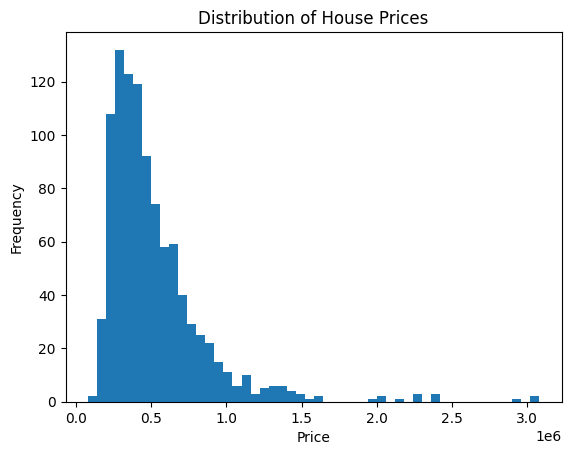

In [ ]:
# Visualize the distribution of the target variable
# obviously change this for your target variable!
# experiment with the number of bins
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


In [ ]:
# Outlier Removal Technique --- there are many... but his one is my favorite
# OPTIONAL --- you don't have to remove the outliers... but you can
from scipy import stats

# Calculate Z-scores for 'price' column
df['price_z'] = np.abs(stats.zscore(df['price']))

# Filter out rows where the Z-score is greater than 3
df = df[df['price_z'] <= 3]

# Drop the 'price_z' column after filtering
df = df.drop(columns=['price_z'])


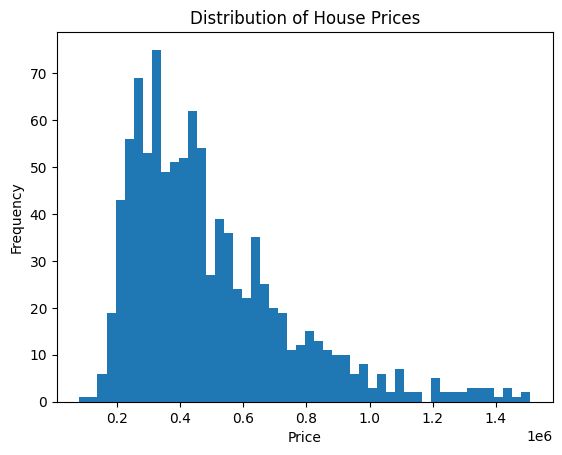

In [ ]:
# Visualize the distribution of the target variable
# obviously change this for your target variable!
# experiment with the number of bins
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

In [ ]:
df.head()

,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price,total_sqft
id,,,,,,,,
7129300520,3,1180,5650,1,1180,0,221900.0,1180
6414100192,3,2570,7242,2,2170,400,538000.0,2970
5631500400,2,770,10000,1,770,0,180000.0,770
2487200875,4,1960,5000,1,1050,910,604000.0,2870
1954400510,3,1680,8080,1,1680,0,510000.0,1680


## Scale the Data!  (optional)
## and do your X,y split
### and do your 80/20 train-test-split

In [ ]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split data into features and target
# Remember to update this for your target... mine is called price
X = df.drop(columns=['price'])
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the column transformer
transformer = make_column_transformer(
    (MinMaxScaler(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']),
    remainder='passthrough'
)

# Fit and transform the training data, and transform the test data
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


In [ ]:
# Get feature names after transformation
feature_names = transformer.get_feature_names_out()

# Convert transformed arrays back to DataFrames with appropriate feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Display the first few rows of the scaled training data
X_train_df.head()

,minmaxscaler__sqft_living,minmaxscaler__sqft_lot,minmaxscaler__sqft_above,minmaxscaler__sqft_basement,remainder__bedrooms,remainder__floors,remainder__total_sqft
id,,,,,,,
7899800860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3126069068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2460700260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5466410030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5009600070,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Build the Neural Network Model

In [ ]:
# Run a data quality report
report_df = data_quality_report(X_train_df)
report_df

,Column,Data Type,Unique Values,Potential Problems,Recommendations
0,minmaxscaler__sqft_living,float64,0,Missing values (count: 786),Consider imputing missing values or removing rows
1,minmaxscaler__sqft_lot,float64,0,Missing values (count: 786),Consider imputing missing values or removing rows
2,minmaxscaler__sqft_above,float64,0,Missing values (count: 786),Consider imputing missing values or removing rows
3,minmaxscaler__sqft_basement,float64,0,Missing values (count: 786),Consider imputing missing values or removing rows
4,remainder__bedrooms,float64,0,Missing values (count: 786),Consider imputing missing values or removing rows
5,remainder__floors,float64,0,Missing values (count: 786),Consider imputing missing values or removing rows
6,remainder__total_sqft,float64,0,Missing values (count: 786),Consider imputing missing values or removing rows


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Visualize the shape of your neural network:
# Text summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

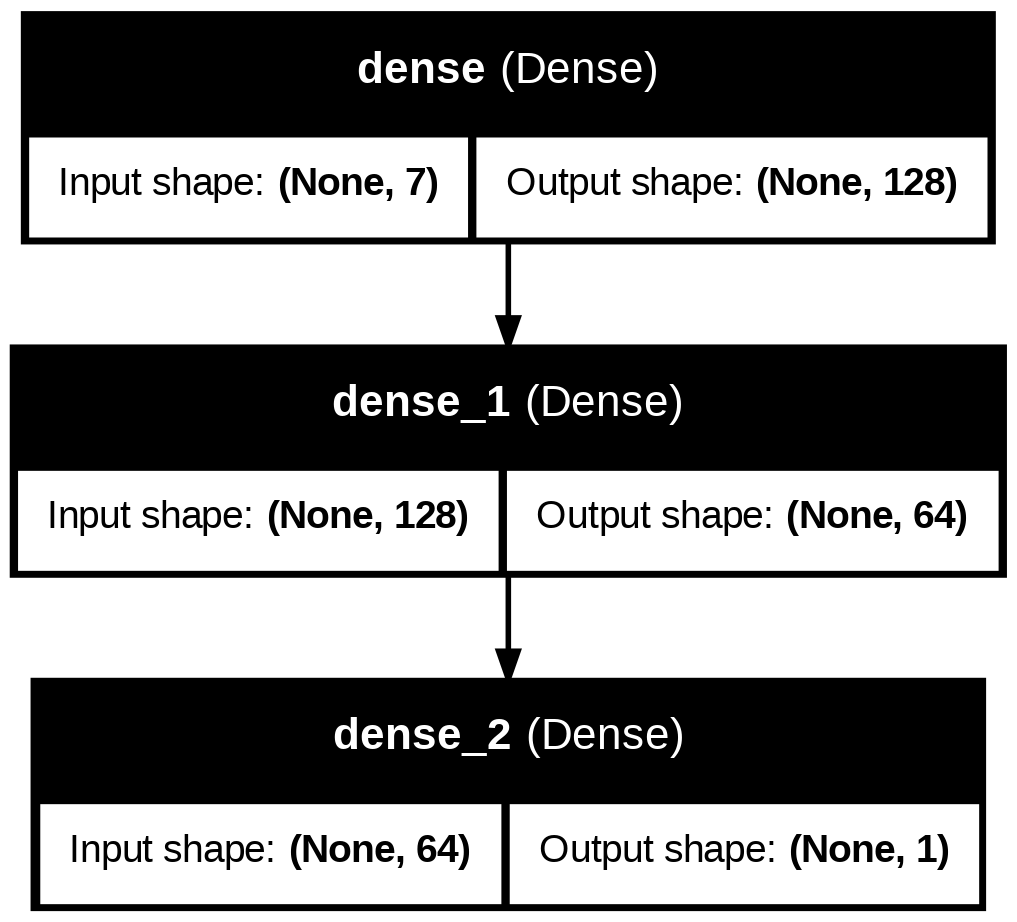

In [ ]:
from tensorflow.keras.utils import plot_model

# Generate a visual diagram of the model structure
plot_model(model, show_shapes=True, show_layer_names=True)


In [ ]:
# Save all of the python libs to a file so that you can use it later
# !pip list
# !pip freeze > requirements.txt
# !pip install -r requirements.txt

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 280534351872.0000 - mae: 470455.4062 - val_loss: 247755177984.0000 - val_mae: 440892.8750
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 228536762368.0000 - mae: 401809.1875 - val_loss: 205861109760.0000 - val_mae: 355981.2812
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 190559305728.0000 - mae: 333667.4688 - val_loss: 151828086784.0000 - val_mae: 304386.2188
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129240489984.0000 - mae: 265075.2812 - val_loss: 80717791232.0000 - val_mae: 192579.7344
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69229584384.0000 - mae: 178295.1719 - val_loss: 44566446080.0000 - val_mae: 158830.4531
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28956332032.0000 - mae: 130363.6094 - val_loss: 45778395136.0000 - val_mae: 164203.6875
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29320474624.0000 - mae: 133703.4062 - val_loss: 407

In [ ]:
# Evaluate the model using RMSE
predictions = model.predict(X_test)
rmse = np.sqrt(np.mean((y_test - predictions.flatten()) ** 2))
print(f"Test RMSE: {rmse}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test RMSE: 213474.5390939196


In [ ]:
# Epoch - number of times that the entire dataset has been seen by the NN
# in this case - 20/20 - these are the "batches" ... in other words - the model is exposed to a batch of data... learns from that...and then updates the coefficients
# loss: this is how well the model is fitting the data.  lower values indicate better performance.  in this case - it is very hight.  I wonder if this is due to the scaling????
# is MAE:  Mean Absolute Error.... in this case... it is 140K meaning that the average error is off by 140K


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 38635634688.0000 - mae: 148788.1250 - val_loss: 50028920832.0000 - val_mae: 169674.0938
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37743185920.0000 - mae: 147652.2656 - val_loss: 49921187840.0000 - val_mae: 169446.0469
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 34095734784.0000 - mae: 141244.2344 - val_loss: 50065063936.0000 - val_mae: 169756.8281
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 40689565696.0000 - mae: 153485.2500 - val_loss: 49792081920.0000 - val_mae: 169155.3125
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33226293248.0000 - mae: 138909.9531 - val_loss: 49765744640.0000 - val_mae: 169092.0469
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 34432425984.0000 - mae: 139494.9375 - val_loss: 50234269696.0000 - val_mae: 170119.9688
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36582305792.0000 - mae: 147975.7656 - val_loss: 50029

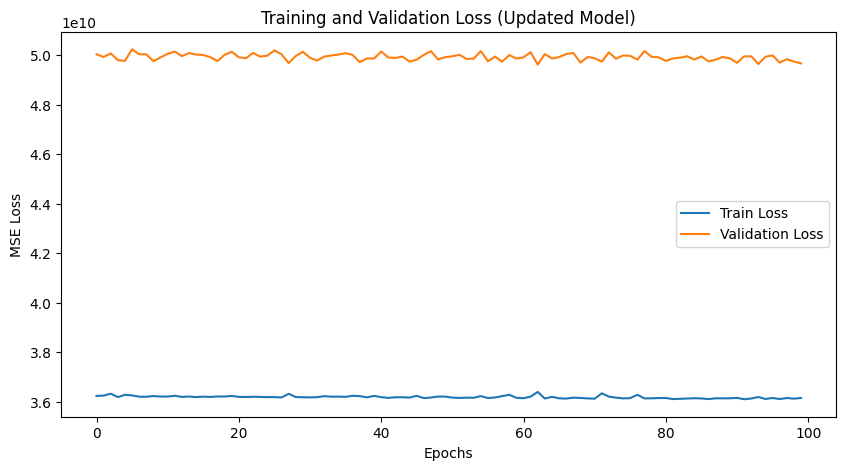

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)
# Plot training and validation loss over epochs - courtesy of Christian Vivas!
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Updated Model)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
# Predict on new data
new_predictions = model.predict(X_test[:5])
print("Sample predictions:", new_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Sample predictions: [523887.5  246099.44 560885.2  289022.88 214334.25]


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(to_drop, axis=1)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [ ]:
# How old is the house?
df['house_age'] = [2021 - yr_built for yr_built in df['yr_built']]

# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0
    for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2021 - yr_renovated) <= 10
    else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2021 - yr_renovated) <= 30
    else 0 for yr_renovated in df['yr_renovated']]

# Drop original columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1


In [ ]:
df['city'].value_counts()

,count
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Issaquah,187
Kirkland,187
Kent,185
Auburn,176
Sammamish,175


In [ ]:
def remap_location(data: pd.DataFrame,
                   location: str,
                   threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

In [ ]:
remap_location(data=df,location="Seattle")

'Seattle'

In [ ]:
remap_location(data=df,location="Milton")

'Rare'

In [ ]:
df['city'] = df['city'].apply(
    lambda x: remap_location(data=df, location=x)
)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
1336,160000.0,2.0,1.00,1180,9350,1.0,0,0,3,1180,0,Seattle,103,0,0,0
872,210000.0,3.0,1.00,1080,21043,1.0,0,0,3,1080,0,Seattle,79,1,0,1
2089,609900.0,4.0,2.50,3190,7399,2.0,0,0,3,3190,0,Maple Valley,15,0,0,0
3127,385000.0,3.0,3.25,1630,1677,3.0,0,0,3,1630,0,Seattle,14,0,0,0
917,307000.0,3.0,1.00,1370,7500,1.0,0,0,3,1370,0,Rare,61,1,1,0
905,280000.0,3.0,2.50,1720,1916,2.0,0,0,3,1720,0,Renton,16,0,0,0
1093,255000.0,3.0,1.50,1060,9039,1.0,0,0,3,1060,0,Renton,48,1,1,0
3461,580000.0,4.0,1.75,1720,6975,1.0,0,0,3,1420,300,Redmond,46,0,0,0
261,581000.0,4.0,2.00,2510,13695,1.0,0,0,4,1280,1230,Kirkland,60,1,0,1
680,340000.0,3.0,2.25,1970,3716,2.0,0,0,3,1970,0,Renton,24,0,0,0


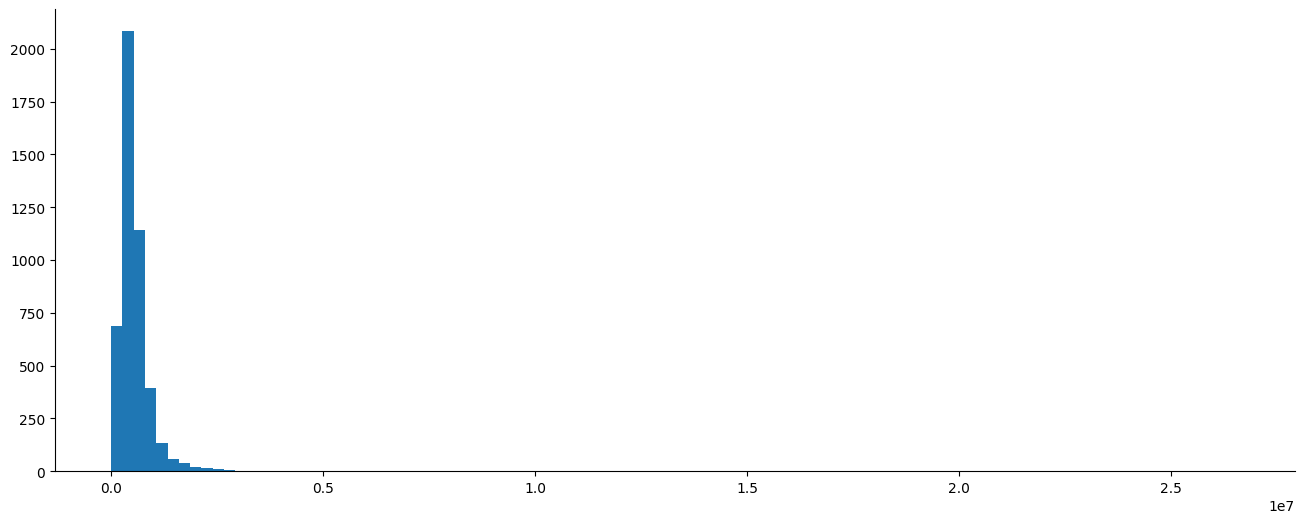

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['price'], bins=100);

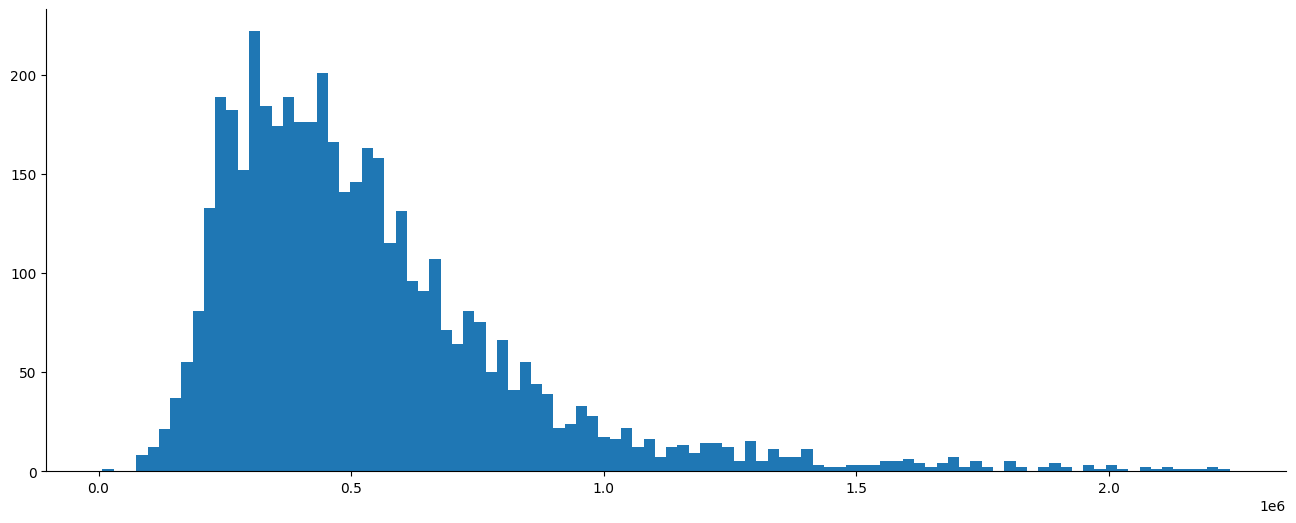

In [ ]:
from scipy import stats


# Calculate Z-values
df['price_z'] = np.abs(stats.zscore(df['price']))

# Filter out outliers
df = df[df['price_z'] <= 3]

# Remove houses listed for $0
df = df[df['price'] != 0]

# Drop the column
df = df.drop('price_z', axis=1)

# Draw a histogram
plt.hist(df['price'], bins=100);

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


transformer = make_column_transformer(
    (MinMaxScaler(),
        ['sqft_living', 'sqft_lot','sqft_above',
         'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'),
        ['bedrooms', 'bathrooms', 'floors',
         'view', 'condition'])
)

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Fit
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
X_train.toarray()


array([[0.21438849, 0.33897196, 0.21438849, ..., 1.        , 0.        ,
        0.        ],
       [0.26043165, 0.00742988, 0.10503597, ..., 0.        , 0.        ,
        1.        ],
       [0.55251799, 0.02588045, 0.55251799, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.27194245, 0.01478794, 0.27194245, ..., 1.        , 0.        ,
        0.        ],
       [0.56115108, 0.00799192, 0.4028777 , ..., 0.        , 0.        ,
        1.        ],
       [0.21007194, 0.01236491, 0.21007194, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 614513.2500 - rmse: 614513.5625
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 513532.2188 - rmse: 513530.7500
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 270245.2188 - rmse: 270245.5938
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 248825.4531 - rmse: 248825.8281
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 236877.3125 - rmse: 236877.6406
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 229483.2812 - rmse: 229483.5312
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 224541.3438 - rmse: 224541.5469
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 221029.0625 - rmse: 221029.2188
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 218412.1406 - rmse: 218412.2656
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 216377.7188 - rmse: 216377.8125
Epoch 11/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 214730.

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[ 476963.2 ],
       [ 582947.2 ],
       [1226200.8 ],
       [ 274956.06],
       [ 321738.03]], dtype=float32)

In [ ]:
predictions = np.ravel(predictions)
predictions[:5]

rmse(y_test,predictions).numpy()

190798.95843083036